In [13]:
import tensorflow as tf
import pandas as pd

#((None, 4, 1) vs (None,)).
#expected shape=(None, 1, 4), found shape=(None, 4)




In [14]:
tabla = pd.read_csv('./tabla_prediccion.csv', index_col=0)

tabla

,porcentajeGastoEducacion,porcentajeGastoSalud,indicadorPobreza,indicadorDemografico,indicadorDesarrolloHumano
12,4.08791,8.5,72.9,17.2,0.500
52,3.15719,6.0,1.6,32.2,0.745
88,3.34060,6.0,4.7,29.1,0.706
124,3.27428,4.0,9.4,27.0,0.671
292,2.28146,4.5,50.9,16.4,0.517
...,...,...,...,...,...
31527,2.88026,8.4,0.4,33.9,0.782
31647,2.80096,11.2,1.4,32.7,0.758
31710,2.86987,13.0,0.6,31.6,0.743
31892,3.66906,5.7,10.6,25.8,0.757


In [15]:
import numpy as np

X = np.asarray(tabla[["porcentajeGastoEducacion", "porcentajeGastoSalud", "indicadorPobreza", "indicadorDemografico"]])

Y = np.asarray(tabla["indicadorDesarrolloHumano"])

In [16]:
Y.shape

(231,)

In [17]:
X.shape

(231, 4)

In [18]:
modelo_denso = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(700, input_shape=[4]),    
    tf.keras.layers.Dense(700,activation='relu'),
    tf.keras.layers.Dense(700),
    tf.keras.layers.Dense(1)    
    
])

In [19]:
modelo_denso.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = 'mean_squared_error',
)

In [20]:
tensorBoard_denso = tf.keras.callbacks.TensorBoard(log_dir = 'logs/cas')

print("Entrenando...")

historial = modelo_denso.fit(X, Y, 
                 validation_split = 0.15,
                 epochs = 50,
                 callbacks = [tensorBoard_denso],
                 verbose = False
                )

print("modelo entrenado")


Entrenando...
modelo entrenado


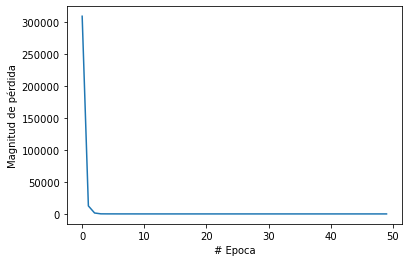

In [21]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [22]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 26668), started 2:49:04 ago. (Use '!kill 26668' to kill it.)

In [23]:

asd = [[4.9, 8.7, 5.3, 37]]
a = modelo_denso.predict(asd)
a[0][0]



1/1 [==============================] - 0s 53ms/step


0.7223564

In [24]:
modelo_denso.save('prediccionidh.h5')


In [25]:
!tensorflowjs_converter --input_format keras prediccionidh.h5 modelo_salida

2022-07-19 21:26:17.325314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 21:26:17.325380: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
pais_dim.to_csv("./producto/pais_dim.csv")
tiempo_dim.to_csv("./producto/tiempo_dim.csv")